In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa.display
from scipy.io import wavfile

## 窓関数

### Hamming窓
$$ w_a(t) = 0.54 - 0.46 \cos \left( \frac{2 \pi t}{N} \right) $$

### Hanning(Hann)窓
$$ w_a(t) = 0.5 - 0.5 \cos \left( \frac{2 \pi t}{N} \right) $$

### Blackman窓
$$ w_a(t) = 0.42 - 0.5 \cos \left( \frac{2 \pi t}{N} \right) + 0.08 \cos \left( \frac{4 \pi t}{N} \right) $$

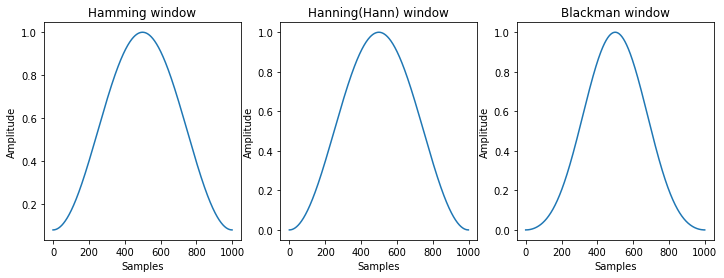

In [9]:
hamming_window = np.hamming(1000)    # Hamming窓
hann_window = np.hanning(1000)       # Hann窓
blackman_window = np.blackman(1000)  # Blackman窓

plt.figure(figsize=(12, 4))
windows_dict = {'Hamming window': hamming_window,
                'Hanning(Hann) window': hann_window,
                'Blackman window': blackman_window}
for i, w in enumerate(windows_dict.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(w[1])
    plt.title(w[0])
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
plt.show()

### 高速フーリエ変換(Fast Fourier Transfer)
時間領域から周波数領域に変換する．

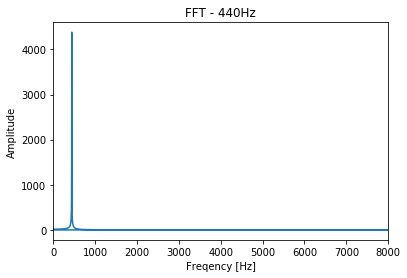

In [22]:
sr, data = wavfile.read('./src/decay_sine.wav')
data = data / (2**15 - 1)  # 振幅の配列(16bitなのでmax=1にするため正規化)

fft_data = np.abs(np.fft.fft(data))             # 縦軸: 振幅
freq = np.fft.fftfreq(data.shape[0], d=1.0/sr)  # 横軸: 周波数

plt.plot(freq, fft_data)
plt.title('FFT - 440Hz')
plt.xlabel('Freqency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, 8000)  # 8000Hzまで
plt.show()

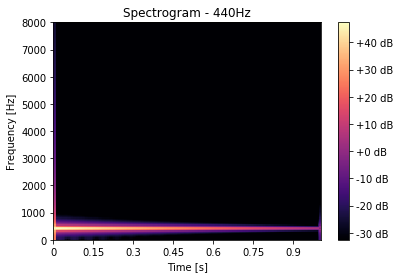

In [25]:
fft_size = 1024                 # フレーム長
hop_length = int(fft_size / 4)  # フレームシフト長

# 短時間フーリエ変換
amplitude = np.abs(librosa.stft(data,
                                n_fft=fft_size, hop_length=hop_length))
log_power = librosa.amplitude_to_db(amplitude)  # 振幅をデシベル単位に変換

# スペクトログラム表示
librosa.display.specshow(log_power, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='hz',
                         cmap='magma')
plt.title('Spectrogram - 440Hz')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 8000)
plt.colorbar(format='%+2.0f dB')
plt.show()